# RF/DN Multiclass Comparisons on CIFAR10

In [1]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    input = open(filename, "r")
    lines = input.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def produce_mean(ls):
    """
    Produces means from list of 8 results
    """
    ls_space = []
    for i in range(int(len(ls) / 8)):
        l = ls[i * 8 : (i + 1) * 8]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)

In [4]:
# Load 90-classes accuracies
acc_90 = [
    load_result("90_class/naive_rf.txt"),
    load_result("90_class/cnn32.txt"),
    load_result("90_class/cnn32_2l.txt"),
    load_result("90_class/cnn32_5l.txt"),
    load_result("90_class/resnet18.txt"),
    load_result("90_class/svm.txt"),
]

time_90 = [
    load_result("90_class/naive_rf_time.txt"),
    load_result("90_class/cnn32_time.txt"),
    load_result("90_class/cnn32_2l_time.txt"),
    load_result("90_class/cnn32_5l_time.txt"),
    load_result("90_class/resnet18_time.txt"),
    load_result("90_class/svm_time.txt"),
]

accs = [acc_90, time_90]

In [5]:
def plot_acc(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][5][k * 8 : (k + 1) * 8],
            color="#984ea3",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32_1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#984ea3",
            label="SVM",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN32_2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="Resnet18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN32_5L",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )

        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#984ea3",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )

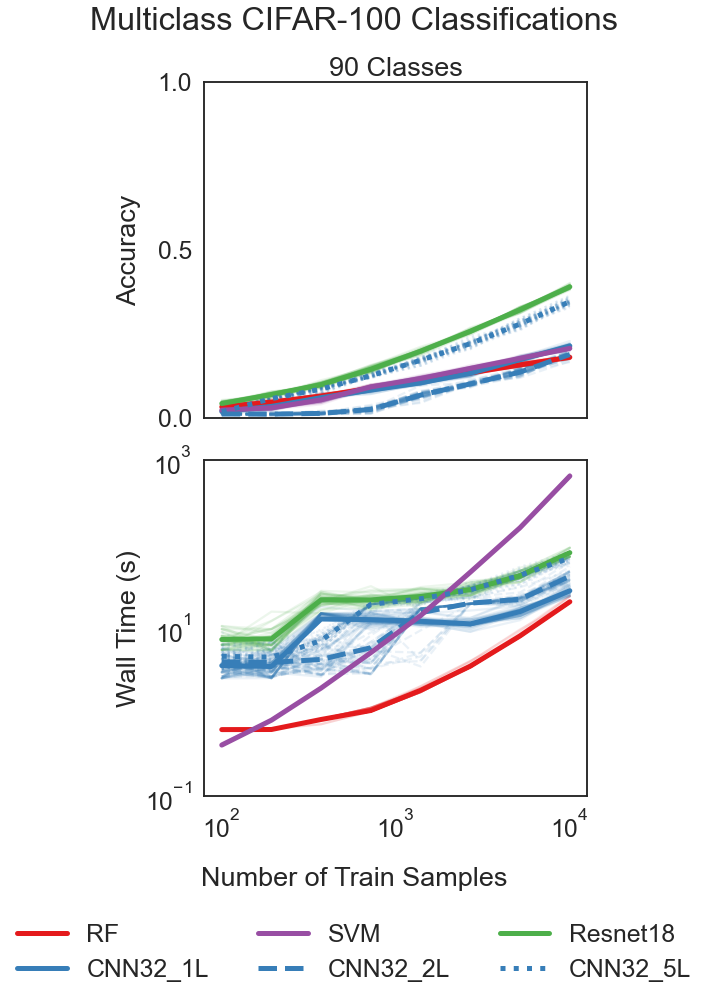

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 11), constrained_layout=True)

plt.suptitle("Multiclass CIFAR-100 Classifications", x=0.53, y=1.03, va="baseline")
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(100, 10000, num=8, dtype=int)
xtitles = ["90 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-1, 1e3]]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[i])

    # Label x axis and plot figures
    if i == 0:
        col.set_xticks([])
        col.set_title(xtitles[i])
        plot_acc(col, accs, i)
    else:
        col.set_xticks([1e2, 1e3, 1e4])
        col.set_yscale("log")
        plot_acc(col, accs, i)

    # Label y axis
    col.set_yticks(yticks[i])
    col.set_ylabel(ytitles[i])

            
fig.align_ylabels(ax[:, ])

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.2),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)